# Analysis_3
-  to see whether there is a certain behavior pattern

In [77]:
import json
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [78]:
%matplotlib inline

In [79]:
import matplotlib.pyplot as plt

In [86]:
best = pd.read_csv('ana_2_output/ana2_2_all_appear&population.csv')

In [87]:
best.head()

,Pokemon No.,Name,Type 1,appear_rate,l_evening,l_morn,l_night,population_density
0,1,Bulbasaur,Grass,0.456000,0.253185,0.291401,0.455414,1851.392773
1,2,Ivysaur,Grass,0.033333,0.279070,0.302326,0.418605,1867.937864
2,3,Venusaur,Grass,0.004000,0.200000,0.200000,0.600000,379.295705
3,4,Charmander,Fire,0.246000,0.298780,0.378049,0.323171,1852.447109
4,5,Charmeleon,Fire,0.007667,0.100000,0.300000,0.600000,1047.189039


In [88]:
def convert_showup(row):
    l = [row['l_evening'], row['l_morn'], row['l_night']]
    result = 0;
    if max(l) == l[0]:
        result = max(l)*10
    elif  max(l) == l[1]:
        result = max(l)*100
    elif  max(l) == l[2]:
        result = max(l)*1000
    return result

In [89]:
best['appearance_convert'] = best.apply(convert_showup,axis = 1)

In [90]:
best = best.drop([67,131,143,144,145],axis = 0)
best.to_csv('check.csv', encoding='utf-8')

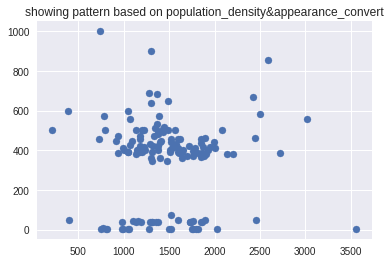

In [92]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(best['population_density'], best['appearance_convert'])
plt.title('showing pattern based on population_density&appearance_convert')

In [93]:
fig.savefig('ana_3_cluster_first.png')

In [94]:
best['population_density'] = best['population_density'].apply(lambda x :float(("%.1f" %x)))
print('done')

done


In [95]:
best['appearance_convert'] = best['appearance_convert'].apply(lambda x :float(("%.1f" %x)))
print('done')

done


In [96]:
df = best.loc[:,['population_density','appearance_convert']]

In [97]:
df.head()

,population_density,appearance_convert
0,1851.4,455.4
1,1867.9,418.6
2,379.3,600.0
3,1852.4,37.8
4,1047.2,600.0


In [98]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)

In [99]:
kmeans.labels_

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0], dtype=int32)

In [100]:
p = kmeans.labels_

In [101]:
se = pd.Series(p)
best['show_pattern'] = se.values

In [102]:
best.head()

,Pokemon No.,Name,Type 1,appear_rate,l_evening,l_morn,l_night,population_density,appearance_convert,show_pattern
0,1,Bulbasaur,Grass,0.456000,0.253185,0.291401,0.455414,1851.4,455.4,1
1,2,Ivysaur,Grass,0.033333,0.279070,0.302326,0.418605,1867.9,418.6,1
2,3,Venusaur,Grass,0.004000,0.200000,0.200000,0.600000,379.3,600.0,0
3,4,Charmander,Fire,0.246000,0.298780,0.378049,0.323171,1852.4,37.8,1
4,5,Charmeleon,Fire,0.007667,0.100000,0.300000,0.600000,1047.2,600.0,0


In [110]:
best.to_csv('ana_4_patterns.csv', encoding='utf-8')

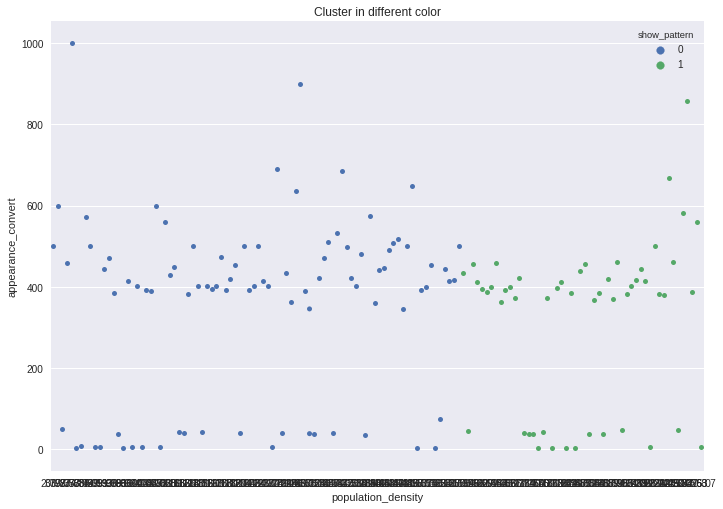

In [103]:
import seaborn as sns
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.stripplot(x="population_density", y="appearance_convert", hue="show_pattern",data=best,ax=ax)
sns.plt.title('Cluster in different color')

In [104]:
fig.savefig('ana_3_cluster_after.png')

In [105]:
kmeans.cluster_centers_

array([[ 1186.73483146,   359.48764045],
       [ 1942.21730769,   318.79807692]])

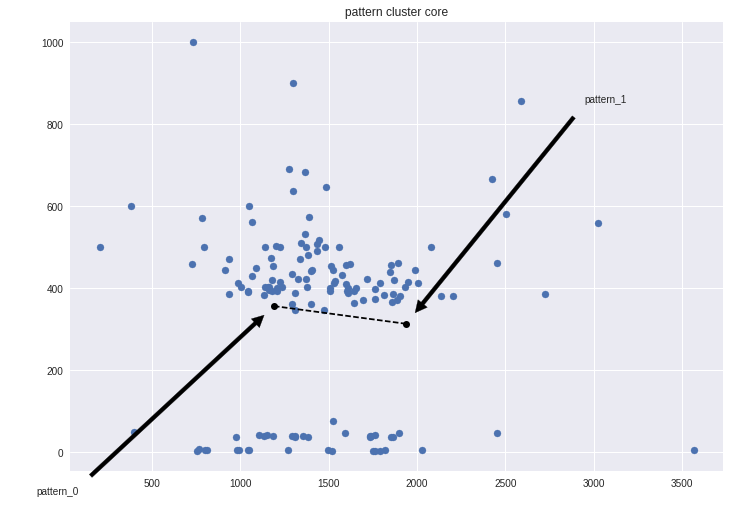

In [107]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.scatter(best['population_density'], best['appearance_convert'])
ax.plot([1190.09230769,1938.1509434],
       [356.11428571,312.8490566], 'ko--')
ax.annotate('pattern_0',
            xy=(1190.09230769,356.11428571),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')
ax.annotate('pattern_1',
            xy=(1938.1509434,312.8490566),  # theta, radius
            xytext=(0.80, 0.80),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')
plt.title('pattern cluster core')

In [108]:
fig.savefig('ana_3_cluster_center.png')